In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt

This file contains the stock information of Microsoft from 04/01/2015 to 04/01/2021  
このファイルは、2015/01/04から2021/01/04までのマイクロソフトの株式情報を収録しています　　 https://www.kaggle.com/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis

In [2]:
df =pd.read_csv('../input/Microsoft_stock.csv')

In [19]:
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [26]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


In [23]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [29]:
print("Time period from{} to {}".format(df.Date.min(),df.Date.max()))

Time period from2015-04-01 16:00:00 to 2021-03-31 16:00:00


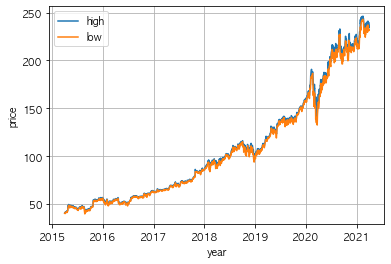

In [66]:
#株価の変動
plt.plot(df['Date'], df['High'], markerfacecolor="r", label="high")
plt.plot(df['Date'], df['Low'], markerfacecolor="b", label="low")
plt.xlabel("year")
plt.ylabel("price")
plt.grid(True)
plt.legend()
plt.show()

high, lowにはあまり大きな差は見られない？

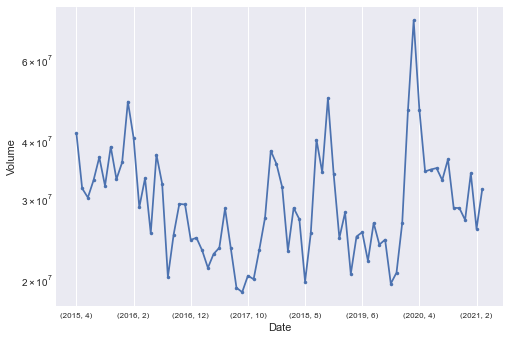

In [114]:
#Volume Averageの変化

figsize=(12,4)

df.groupby([df.Date.dt.year, df.Date.dt.month])['Volume'].mean().plot(marker=".")
plt.xticks(size=8)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.yscale("log")
plt.show()

2019年12月-2020年4月の上がり幅が高い  

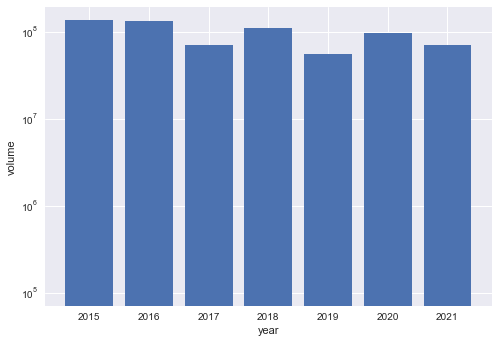

In [101]:
#volume の年ごとの推移
plt.bar(df.Date.dt.year, df.Volume)
plt.yscale("log")
plt.xlabel("year")
plt.ylabel("volume")
plt.show()

2017年, 2019年, 2021年はほかの年と比較して前年より下がり幅がでかい？

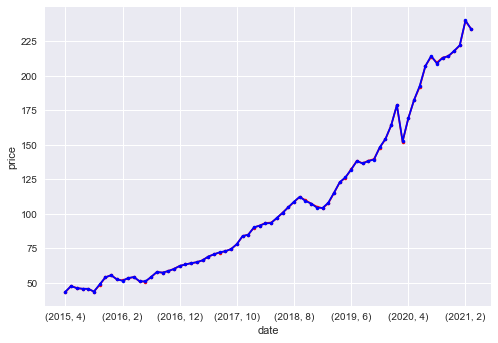

In [111]:
#始値の変化
figsize=(12,4)
df.groupby([df.Date.dt.year, df.Date.dt.month])["Open"].mean().plot(marker=".",
                                                                   color="r")
df.groupby([df.Date.dt.year, df.Date.dt.month])["Close"].mean().plot(marker=".",
                                                                    color="b")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

始値、終値の違いはそんなになさそう  
そもそもこの2値の違いに意味はない？